In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("data/diabetic_data.csv")

# replacing ? with NaN
df = df.replace('?', np.nan)

df = df[df['readmitted'].isin(['<30', '>30', "NO"])]

# delete columns with more than 40% missing data
missing_threshold = 0.4
df = df.loc[:, df.isnull().mean() < missing_threshold]

# delete rows with missing values
df = df.dropna()

# Removing id and nbr
df = df.drop(['encounter_id', 'patient_nbr'], axis=1)

# Getting all categorical columns
categorical_cols = df.select_dtypes(include='object').columns.drop('readmitted')

# Doing one-hot encoding for the categorical columns, basically converting them to 0 or 1
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Setting readmitted to be 0, 1, or 2 based on class labels
df['readmitted'] = df['readmitted'].map({
    "NO": 0,
    "<30": 1,
    ">30": 2
})

# Keeping the original dataframe as well
original_df = df

print(f"Dataset shape after cleaning: {df.shape}")

Dataset shape after cleaning: (59129, 2163)


In [ ]:
# label encoding for the target variable
X = df.drop("readmitted", axis=1)
y = df["readmitted"]

In [4]:
# Split the dataset into features and target variable
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Further split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=13)

In [ ]:
# best_hyperparams = {
#     'hidden_layer_sizes': (64,),
#     'activation': 'relu',
#     'solver': 'adam',
#     'alpha': 0.01,
#     'learning_rate': 'constant',
#     'learning_rate_init': 0.001,
#     'max_iter': 500,
#     'n_iter_no_change': 30,
# }
# # Validation accuracy: 0.4696

# best_hyperparams = {
#     'hidden_layer_sizes': (64,),
#     'activation': 'relu',
#     'solver': 'adam',
#     'alpha': 0.01,
#     'learning_rate': 'constant',
#     'learning_rate_init': 0.01,
#     'max_iter': 500,
#     'n_iter_no_change': 30,
# }
# # Validation accuracy: 0.5772

# best_hyperparams = {
#     'hidden_layer_sizes': (64,),
#     'activation': 'relu',
#     'solver': 'adam',
#     'alpha': 0.1,
#     'learning_rate': 'constant',
#     'learning_rate_init': 0.001,
#     'max_iter': 500,
#     'n_iter_no_change': 30,
# }
# # Validation accuracy: 0.5538

# best_hyperparams = {
#     'hidden_layer_sizes': (64,),
#     'activation': 'relu',
#     'solver': 'adam',
#     'alpha': 0.1,
#     'learning_rate': 'constant',
#     'learning_rate_init': 0.01,
#     'max_iter': 500,
#     'n_iter_no_change': 30,
# }
# # Validation accuracy: 0.5785

# best_hyperparams = {
#     'hidden_layer_sizes': (64, 32),
#     'activation': 'relu',
#     'solver': 'adam',
#     'alpha': 0.01,
#     'learning_rate': 'constant',
#     'learning_rate_init': 0.001,
#     'max_iter': 500,
#     'n_iter_no_change': 30,
# }
# # Validation accuracy: 0.4747

# best_hyperparams = {
#     'hidden_layer_sizes': (64, 32),
#     'activation': 'relu',
#     'solver': 'adam',
#     'alpha': 0.01,
#     'learning_rate': 'constant',
#     'learning_rate_init': 0.01,
#     'max_iter': 500,
#     'n_iter_no_change': 30,
# }
# # Validation accuracy: 0.5830

In [15]:
best_hyperparams = {
    'hidden_layer_sizes': (64, 32),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.01,
    'learning_rate': 'constant',
    'learning_rate_init': 0.01,
    'max_iter': 500,
    'n_iter_no_change': 30,
}

In [ ]:
mlp = MLPClassifier(**best_hyperparams, random_state=13, verbose=False)
mlp.fit(X_train, y_train)

train_acc = mlp.score(X_train, y_train)
val_acc = mlp.score(X_val, y_val)
test_acc = mlp.score(X_test, y_test)

print(f"Training accuracy:   {train_acc:.4f}")
print(f"Validation accuracy: {val_acc:.4f}")
print(f"Test accuracy:       {test_acc:.4f}")

y_pred = mlp.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Training accuracy:   0.6042
Validation accuracy: 0.5830
Test accuracy:       0.5740

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      6259
           1       0.43      0.02      0.04      1282
           2       0.49      0.46      0.47      4285

    accuracy                           0.57     11826
   macro avg       0.51      0.42      0.40     11826
weighted avg       0.55      0.57      0.54     11826

Confusion Matrix:
[[4793    5 1461]
 [ 633   25  624]
 [2287   28 1970]]


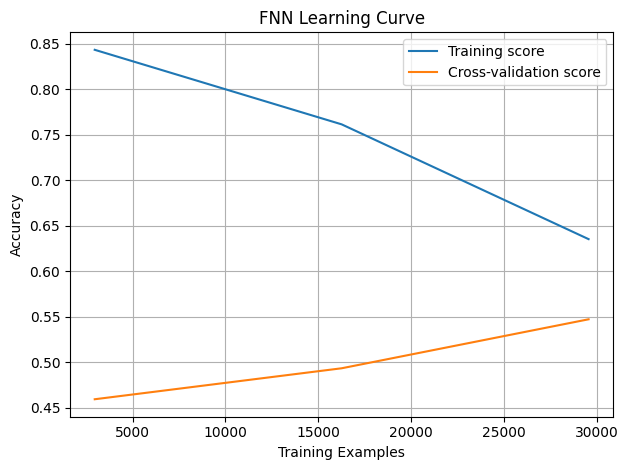

In [19]:
train_sizes, train_scores, test_scores = learning_curve(
    mlp, X, y, 
    cv=2,
    scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 3),
    n_jobs=1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.title("FNN Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

Best alpha: 0.1


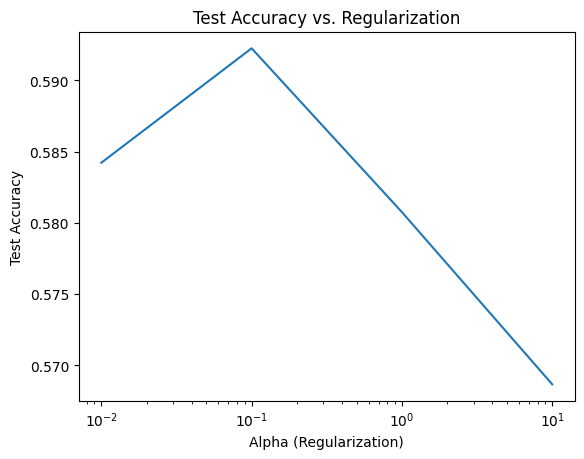

In [ ]:
reg_vals = [0.01, 0.1, 1, 10]
validation_acc = []

temp_hyperparams = {
    'hidden_layer_sizes': (64, 32),
    'activation': 'relu',
    'solver': 'adam',
    'learning_rate': 'constant',
    'learning_rate_init': 0.01,
    'max_iter': 200,
    'early_stopping': True,
    'n_iter_no_change': 30,
}

for alpha in reg_vals:
    model = MLPClassifier(**temp_hyperparams, alpha=alpha, random_state=13, verbose=False)
    model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)
    validation_acc.append(accuracy)
    
    best_index = validation_acc.index(max(validation_acc))
    best_alpha = reg_vals[best_index]
    
best_index = validation_acc.index(max(validation_acc))
best_alpha = reg_vals[best_index]
print(f"Best alpha: {best_alpha}")

plt.plot(reg_vals, validation_acc)
plt.xscale('log')
plt.title('Test Accuracy vs. Regularization')
plt.xlabel('Alpha (Regularization)')
plt.ylabel('Test Accuracy')
plt.show()
